In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import HiggsPortal, HeavyQuark
from utilities import get_color, get_tex_label, latex_text_width_1col

import pickle

base_fig_dim = 7.07

In [2]:
# DM masses
mxs = np.geomspace(50, 250, 500)
# Mediator masses
mM_light, mM_heavy = 200., 1000.
mMs = [mM_light, mM_heavy]
# Approximate DM velocity in Milky Way
vx = 1e-3

# Models
sms = np.array(
    [[HiggsPortal(100, mM, gsxx=1., stheta=1e-1) for mM in mMs],
     [HeavyQuark(100, mM, gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.) for mM in mMs]])

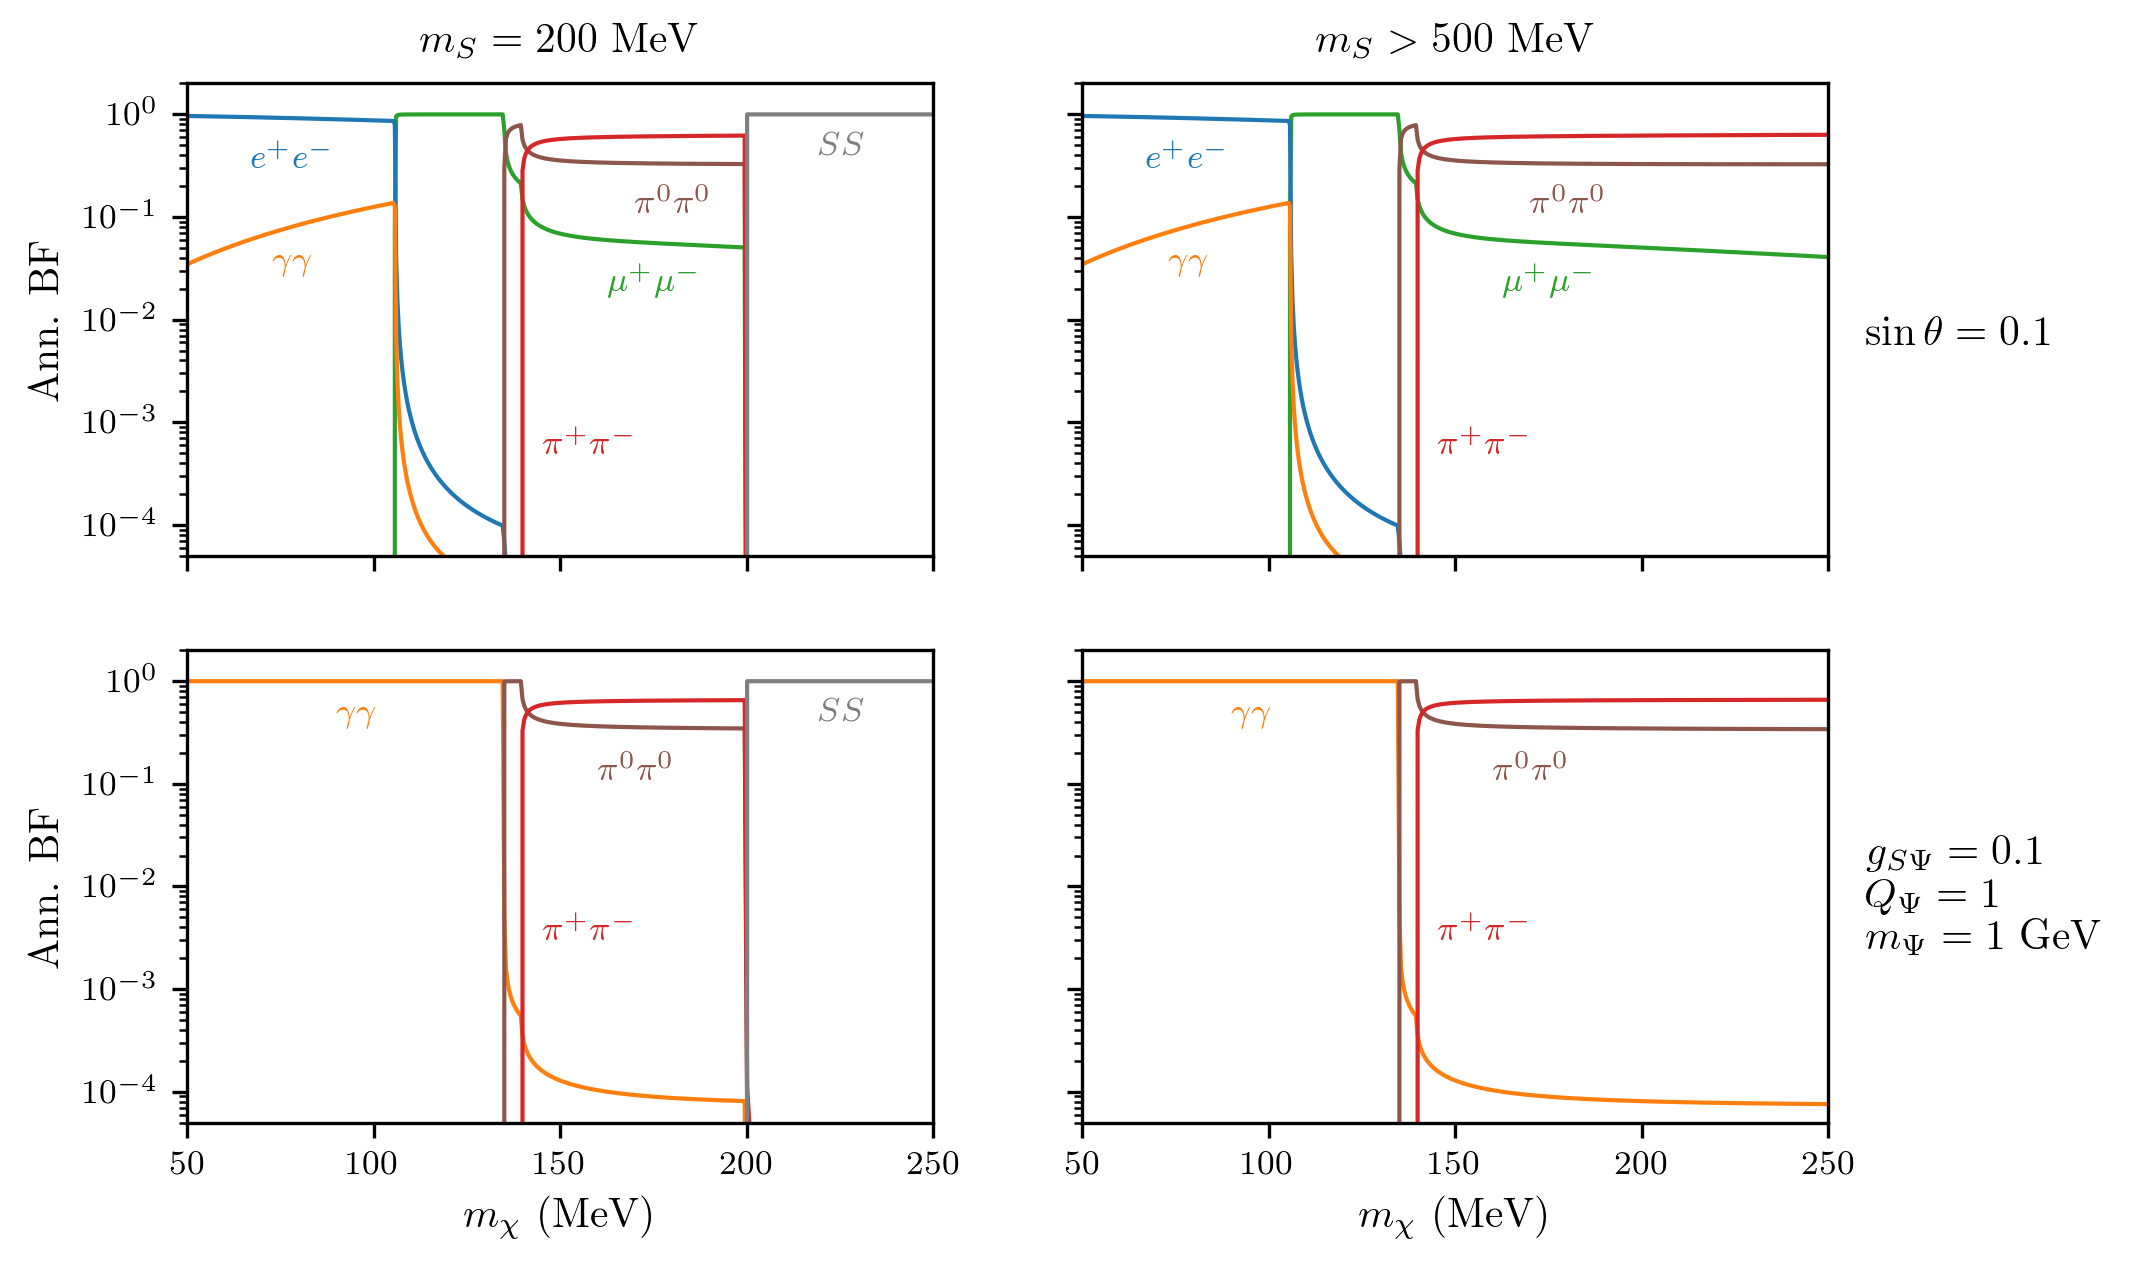

In [3]:
fig, axs = plt.subplots(2,
                        2,
                        sharex=True,
                        sharey=True,
                        figsize=(latex_text_width_1col,
                                 0.65 * latex_text_width_1col))

for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        sm = sms[row, col]  # current model

        # Get branching fractions for each DM mass
        branching_fracts = defaultdict(list)
        sm = sms[row, col]
        for mx in mxs:
            sm.mx = mx
            e_cm = 2 * mx * (1 + 0.5 * vx**2)
            cur_bfs = sm.annihilation_branching_fractions(e_cm)
            # Unpack this dict
            for (fs, bf) in cur_bfs.items():
                branching_fracts[fs].append(bf)

        # Plot BRs
        for (fs, bfs) in branching_fracts.items():
            ax.plot(mxs,
                    bfs,
                    label=get_tex_label(fs),
                    color=get_color(fs),
                    linewidth=1)

        # Formatting
        ax.set_yscale("log")
        ax.set_xlim(mxs[[0, -1]])
        ax.set_ylim(5e-5, 2)

# Only label outer plots' axes
for idx in range(2):
    axs[1, idx].set_xlabel(r"$m_\chi$ (MeV)")
    axs[idx, 0].set_ylabel("Ann. BF")

# Label couplings
axs[0, 1].text(260, 7e-3, r"$\sin\theta = 0.1$", va="center", fontsize=10)
axs[1, 1].text(260,
               7e-3,
               r"$g_{S\Psi} = 0.1$" + "\n" + r"$Q_\Psi = 1$" + "\n" +
               r"$m_\Psi = 1$ GeV",
               va="center",
               fontsize=10)

# Label mediator masses
axs[0, 0].set_title(r"$m_S = 200$ MeV", fontsize=10)
axs[0, 1].set_title(r"$m_S > 500$ MeV", fontsize=10)

# Label final states
for col in range(2):
    axs[0, col].text(78,
                     3e-2,
                     r"$\gamma \gamma$",
                     color=get_color("g g"),
                     fontsize=8,
                     ha="center")
    axs[0, col].text(78,
                     3e-1,
                     r"$e^+ e^-$",
                     color=get_color("e e"),
                     fontsize=8,
                     ha="center")
    axs[0, col].text(145,
                     5e-4,
                     r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"),
                     fontsize=8)
    axs[0, col].text(180,
                     1.1e-1,
                     r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"),
                     fontsize=8,
                     ha="center")
    axs[0, col].text(175,
                     1.9e-2,
                     r"$\mu^+ \mu^-$",
                     color=get_color("mu mu"),
                     fontsize=8,
                     ha="center")

for col in range(2):
    axs[1, col].text(95,
                     4e-1,
                     r"$\gamma \gamma$",
                     color=get_color("g g"),
                     fontsize=8,
                     ha="center")
    axs[1, col].text(145,
                     3e-3,
                     r"$\pi^+ \pi^-$",
                     color=get_color("pi pi"),
                     fontsize=8)
    axs[1, col].text(170,
                     1.1e-1,
                     r"$\pi^0 \pi^0$",
                     color=get_color("pi0 pi0"),
                     fontsize=8,
                     ha="center")
for row in range(2):
    axs[row, 0].text(225,
                     4e-1,
                     r"$S S$",
                     color=get_color("s s"),
                     fontsize=8,
                     ha="center")

fig.savefig("figures/scalar_ann_bfs.pdf", bbox_inches="tight")